In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient
from datetime import datetime
import time

In [2]:
df=pd.read_csv('eplusout.csv')
df.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](TimeStep),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](TimeStep),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](TimeStep),...,Carbon Equivalent:Facility [kg](Hourly),DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),Carbon Equivalent:Facility [kg](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly)
0,04/01 00:10:00,15.433333,NaN,10.3,NaN,101250.666667,NaN,3.0,NaN,19.166667,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
1,04/01 00:20:00,14.366667,NaN,10.0,NaN,101280.333333,NaN,2.9,NaN,8.333333,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
2,04/01 00:30:00,13.300000,NaN,9.7,NaN,101310.000000,NaN,2.8,NaN,357.500000,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
3,04/01 00:40:00,12.233333,NaN,9.4,NaN,101339.666667,NaN,2.7,NaN,346.666667,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN
4,04/01 00:50:00,11.166667,NaN,9.1,NaN,101369.333333,NaN,2.6,NaN,335.833333,...,NaN,0.0,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN


In [3]:
datetimeform= []
for i in range(len(df.index)):
    tt = df["Date/Time"][i]
    days, hours = tt.split('  ')
    tt = f'{days.split("/")[1]}/{days.split("/")[0]}/2017{hours}'
    tt = tt.replace(' ', '')
    if '201724:' in tt:
        tt=tt.replace('24:', '00:')
        timestamp = time.mktime(datetime.strptime(tt, "%d/%m/%Y%H:%M:%S").timetuple())
        timestamp += 86400
        timestamp = datetime.fromtimestamp(timestamp)
        
    else:
        timestamp = time.mktime(datetime.strptime(tt, "%d/%m/%Y%H:%M:%S").timetuple())
        timestamp = datetime.fromtimestamp(timestamp)
    datetimeform.append(timestamp)
    
df["TimeStep"]=datetimeform
df

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](TimeStep),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](TimeStep),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](TimeStep),...,DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),Carbon Equivalent:Facility [kg](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BEDROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:BATHROOM:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](TimeStep),BLOCK1:KITCHEN:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),TimeStep
0,04/01 00:10:00,15.433333,NaN,10.300000,NaN,101250.666667,NaN,3.000000,NaN,19.166667,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:10:00
1,04/01 00:20:00,14.366667,NaN,10.000000,NaN,101280.333333,NaN,2.900000,NaN,8.333333,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:20:00
2,04/01 00:30:00,13.300000,NaN,9.700000,NaN,101310.000000,NaN,2.800000,NaN,357.500000,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:30:00
3,04/01 00:40:00,12.233333,NaN,9.400000,NaN,101339.666667,NaN,2.700000,NaN,346.666667,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:40:00
4,04/01 00:50:00,11.166667,NaN,9.100000,NaN,101369.333333,NaN,2.600000,NaN,335.833333,...,0.000000,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-04-01 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26347,09/30 23:20:00,22.300000,NaN,19.166667,NaN,101223.000000,NaN,1.633333,NaN,290.666667,...,220224.383344,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:20:00
26348,09/30 23:30:00,22.150000,NaN,19.100000,NaN,101224.000000,NaN,1.600000,NaN,288.500000,...,212555.870133,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:30:00
26349,09/30 23:40:00,22.000000,NaN,19.033333,NaN,101225.000000,NaN,1.566667,NaN,286.333333,...,205070.416394,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:40:00
26350,09/30 23:50:00,21.850000,NaN,18.966667,NaN,101226.000000,NaN,1.533333,NaN,284.166667,...,197119.493624,50307.334955,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2017-09-30 23:50:00


In [4]:
# mean value of the 3 indoor zones
df2 = pd.DataFrame()
#"Date/Time",\
#"Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)",\
#"Electricity:Facility [J](TimeStep)"
df2 = df[[
          "BLOCK1:BEDROOM:Zone Mean Air Temperature [C](TimeStep:ON)",\
          "BLOCK1:BATHROOM:Zone Mean Air Temperature [C](TimeStep:ON)",\
          "BLOCK1:KITCHEN:Zone Mean Air Temperature [C](TimeStep:ON)",\
          ]]
df3=df2.copy()
df3.dropna(inplace=True)
df3["mean"] = df3.mean(1)

In [5]:
df_final=pd.DataFrame()
df_final["DateTime"] = df["TimeStep"]
df_final["Outdoor_Mean"] = df["Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)"]
df_final["Indoor_Mean"] = df3["mean"]
df_final["Cooling"] = df["DistrictCooling:Facility [J](TimeStep)"]
df_final["Power"]=df["Electricity:Facility [J](TimeStep)"]
df_final["Delta_T"] = df_final["Indoor_Mean"]-df_final["Outdoor_Mean"]
df_final.set_index("DateTime",inplace=True)
df_final

,Outdoor_Mean,Indoor_Mean,Cooling,Power,Delta_T
DateTime,,,,,
2017-04-01 00:10:00,15.433333,24.517612,0.000000,27449.355191,9.084278
2017-04-01 00:20:00,14.366667,24.406119,0.000000,27449.355191,10.039452
2017-04-01 00:30:00,13.300000,24.285492,0.000000,27449.355191,10.985492
2017-04-01 00:40:00,12.233333,24.168972,0.000000,27449.355191,11.935639
2017-04-01 00:50:00,11.166667,24.055292,0.000000,27449.355191,12.888626
...,...,...,...,...,...
2017-09-30 23:20:00,22.300000,25.661970,220224.383344,37141.789278,3.361970
2017-09-30 23:30:00,22.150000,25.637586,212555.870133,37141.789278,3.487586
2017-09-30 23:40:00,22.000000,25.615123,205070.416394,37141.789278,3.615123


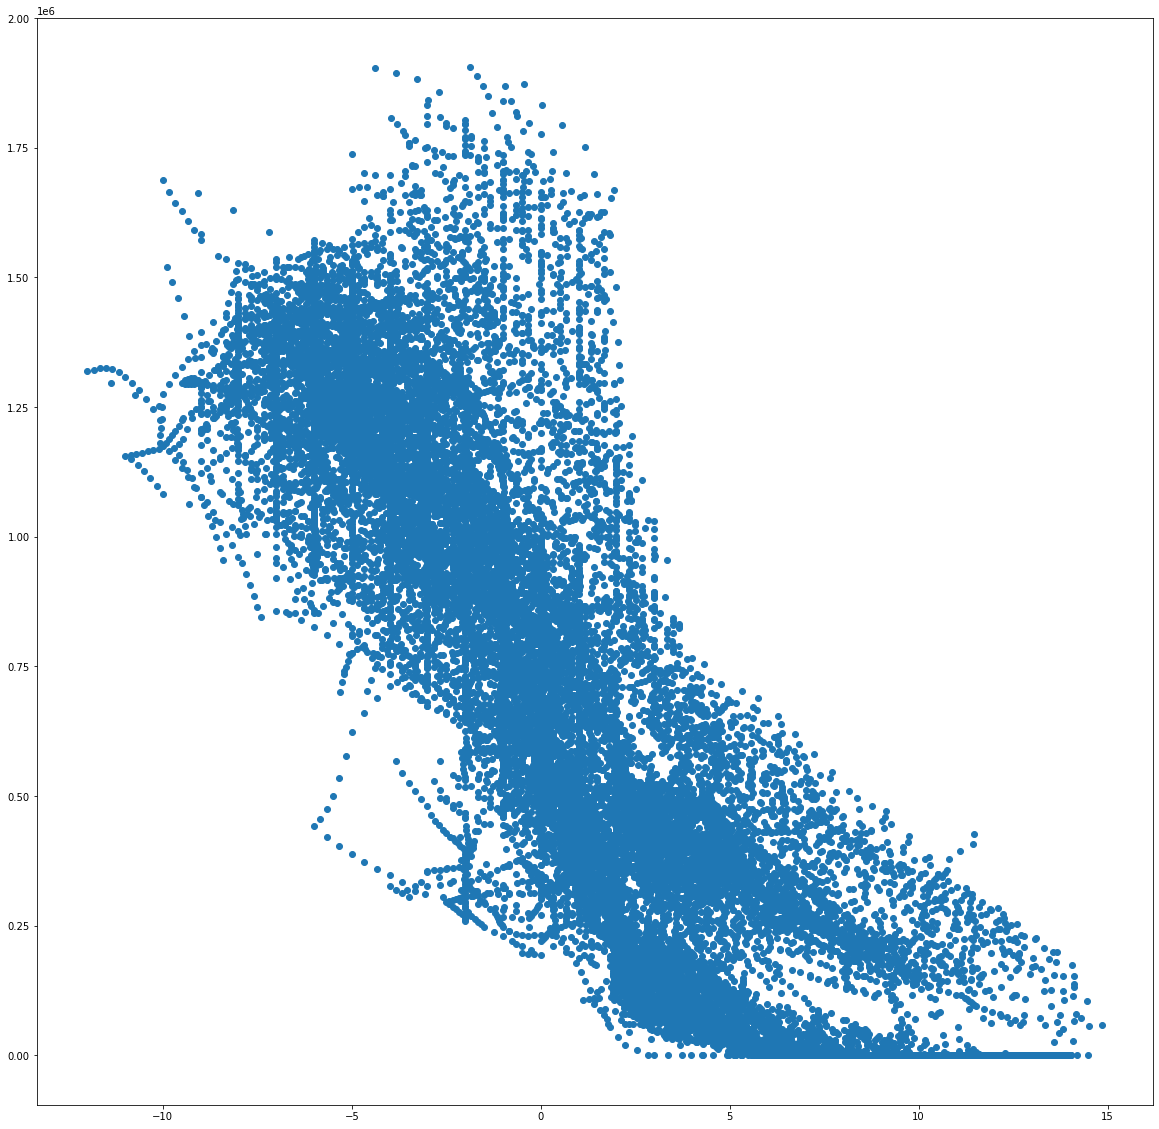

In [6]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.scatter(df_final.Delta_T,df_final.Cooling)


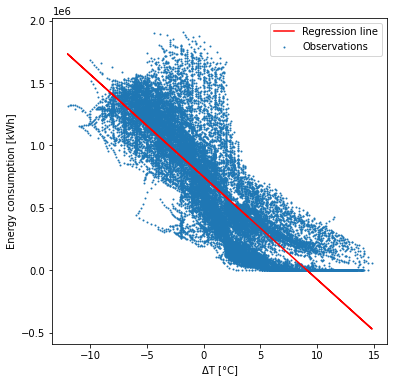

In [16]:
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.figure(figsize=(6,6))
plt.plot(df_final.Delta_T,results.predict(),'r', label='Regression line')
plt.scatter(df_final.Delta_T,df_final.Cooling, label='Observations', s=1)
#plt.title('Energy Signature')
plt.xlabel('ΔT [°C]')
plt.ylabel('Energy consumption [kWh]')
plt.legend()
plt.savefig('firstEnSign.png', dpi=600)

In [1]:
results.summary()

NameError: name 'results' is not defined

In [13]:
df_final=df_final.resample('H').mean()
df_final=df_final.dropna()

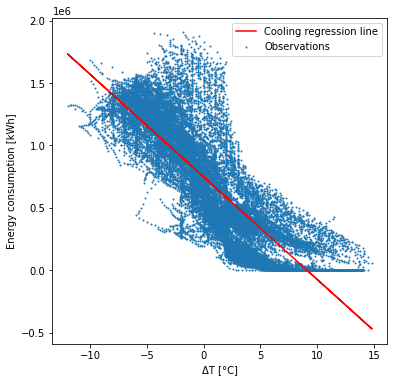

In [17]:
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.figure(figsize=(6,6))
plt.plot(df_final.Delta_T,results.predict(),'r', label='Cooling regression line')
plt.scatter(df_final.Delta_T,df_final.Cooling, label='Observations', s=1)
#plt.title('Energy Signature, hourly resampling')
plt.xlabel('ΔT [°C]')
plt.ylabel('Energy consumption [kWh]')
plt.legend()
plt.savefig('hourlyEnSign.png', dpi=600)

In [ ]:
results.summary()

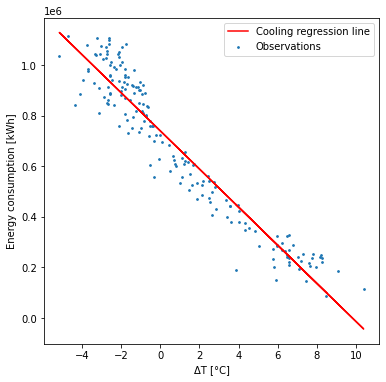

In [20]:
df_final=df_final.resample('D').mean()
df_final=df_final.dropna()
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.figure(figsize=(6,6))
plt.plot(df_final.Delta_T,results.predict(),'r', label='Cooling regression line')
plt.scatter(df_final.Delta_T,df_final.Cooling, label='Observations', s=3)
#plt.title('Energy Signature, daily resampling')
plt.xlabel('ΔT [°C]')
plt.ylabel('Energy consumption [kWh]')
plt.legend()
plt.savefig('dailyEnSign.png', dpi=600)

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1556.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.24e-91
Time:                        22:08:28   Log-Likelihood:                -2383.5
No. Observations:                 184   AIC:                             4771.
Df Residuals:                     182   BIC:                             4777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+05   7749.184     69.599      0.000    5.24e+05    5.55e+05
Delta_T    -8.669e+04   2197.987    -39.440      0.000    -9.1e+04   -8.24e+04
==============================================================================
Omnibus:                        3.252   Durbin-Watson:                   0.596
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.240
Skew:                           0.067   Prob(JB):                        0.326
Kurtosis:                       2.476   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

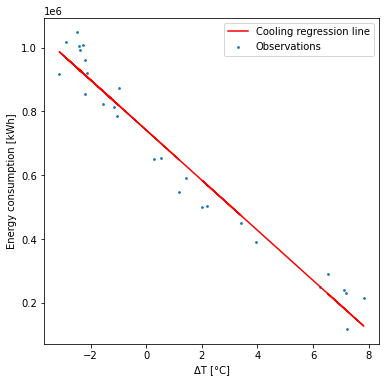

In [21]:
df_final=df_final.resample('W').mean()
df_final=df_final.dropna()
model = sm.OLS(df_final.Cooling,sm.add_constant(df_final.Delta_T))
results=model.fit()
plt.figure(figsize=(6,6))
plt.plot(df_final.Delta_T,results.predict(),'r', label='Cooling regression line')
plt.scatter(df_final.Delta_T,df_final.Cooling, label='Observations',s=3)
#plt.title('Energy Signature, weekly resampling')
plt.xlabel('ΔT [°C]')
plt.ylabel('Energy consumption [kWh]')
plt.legend()
plt.savefig('weeklyEnSign.png',dpi=600)

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     356.9
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.59e-16
Time:                        22:09:13   Log-Likelihood:                -343.14
No. Observations:                  27   AIC:                             690.3
Df Residuals:                      25   BIC:                             692.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.422e+05   1.65e+04     32.777      0.000    5.08e+05    5.76e+05
Delta_T     -8.96e+04   4743.062    -18.891      0.000   -9.94e+04   -7.98e+04
==============================================================================
Omnibus:                        3.319   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.459
Skew:                          -0.132   Prob(JB):                        0.482
Kurtosis:                       1.892   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""